# Partial Dependence Plots

- skip_exec: true


Partial dependence plots show the marginal effect one or two features have on the predicted outcome of a machine learning model. They work by calculating the average prediction of the model as one feature varies, while keeping all other features constant. Here's a basic description of how PDPs are generated:

1. Choose a feature (or features) of interest for which you want to compute the PDP.
2. For each unique value of the chosen feature:
   1. Change all instances of that feature in your dataset to that value, leaving all other features as they are.
   2. Make predictions for this modified dataset and take the average of these predictions. This average prediction corresponds to the partial dependence of the chosen feature's value.
3. Plot the unique feature values against the corresponding average predictions.

A PD plot can show whether the relationship between the target and a feature is linear, monotonic or more complex. For example, when applied to a linear regression model, partial dependence plots always show a linear relationship.

PDPs assume that the feature(s) being plotted are independent of the other features in the dataset. If this assumption is violated, the averages calculated for the partial dependence plot will include data points that are very unlikely or even impossible and this will make our plots unrealistic.


In [ ]:
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_openml, load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import PartialDependenceDisplay
from sklearn.model_selection import train_test_split

pd.set_option("display.max_columns", None)

plt.rcParams["figure.facecolor"] = (1, 1, 1, 0)  # RGBA tuple with alpha=0
plt.rcParams["axes.facecolor"] = (1, 1, 1, 0)  # RGBA tuple with alpha=0

ROOT_DIR = Path.cwd().parent.parent

For classification where the machine learning model outputs probabilities, the partial dependence plot displays the probability for a certain class given different values for feature(s) in the dataset. An easy way to deal with multiple classes is to draw one line or plot per class.


In [ ]:
data = load_breast_cancer()

X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
print(f"Accuracy on test data: {clf.score(X_test, y_test):.2f}")

Accuracy on test data: 0.97


In [ ]:
X_train


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
287,12.890,13.12,81.89,515.9,0.06955,0.03729,0.02260,0.01171,0.1337,0.05581,0.1532,0.4690,1.1150,12.68,0.004731,0.013450,0.016520,0.005905,0.01619,0.002081,13.620,15.54,87.40,577.0,0.09616,0.11470,0.11860,0.05366,0.2309,0.06915
512,13.400,20.52,88.64,556.7,0.11060,0.14690,0.14450,0.08172,0.2116,0.07325,0.3906,0.9306,3.0930,33.67,0.005414,0.022650,0.034520,0.013340,0.01705,0.004005,16.410,29.66,113.30,844.4,0.15740,0.38560,0.51060,0.20510,0.3585,0.11090
402,12.960,18.29,84.18,525.2,0.07351,0.07899,0.04057,0.01883,0.1874,0.05899,0.2357,1.2990,2.3970,20.21,0.003629,0.037130,0.034520,0.010650,0.02632,0.003705,14.130,24.61,96.31,621.9,0.09329,0.23180,0.16040,0.06608,0.3207,0.07247
446,17.750,28.03,117.30,981.6,0.09997,0.13140,0.16980,0.08293,0.1713,0.05916,0.3897,1.0770,2.8730,43.95,0.004714,0.020150,0.036970,0.011100,0.01237,0.002556,21.530,38.54,145.40,1437.0,0.14010,0.37620,0.63990,0.19700,0.2972,0.09075
210,20.580,22.14,134.70,1290.0,0.09090,0.13480,0.16400,0.09561,0.1765,0.05024,0.8601,1.4800,7.0290,111.70,0.008124,0.036110,0.054890,0.027650,0.03176,0.002365,23.240,27.84,158.30,1656.0,0.11780,0.29200,0.38610,0.19200,0.2909,0.05865
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,8.888,14.64,58.79,244.0,0.09783,0.15310,0.08606,0.02872,0.1902,0.08980,0.5262,0.8522,3.1680,25.44,0.017210,0.093680,0.056710,0.017660,0.02541,0.021930,9.733,15.67,62.56,284.4,0.12070,0.24360,0.14340,0.04786,0.2254,0.10840
106,11.640,18.33,75.17,412.5,0.11420,0.10170,0.07070,0.03485,0.1801,0.06520,0.3060,1.6570,2.1550,20.62,0.008540,0.023100,0.029450,0.013980,0.01565,0.003840,13.140,29.26,85.51,521.7,0.16880,0.26600,0.28730,0.12180,0.2806,0.09097
270,14.290,16.82,90.30,632.6,0.06429,0.02675,0.00725,0.00625,0.1508,0.05376,0.1302,0.7198,0.8439,10.77,0.003492,0.003710,0.004826,0.003608,0.01536,0.001381,14.910,20.65,94.44,684.6,0.08567,0.05036,0.03866,0.03333,0.2458,0.06120
435,13.980,19.62,91.12,599.5,0.10600,0.11330,0.11260,0.06463,0.1669,0.06544,0.2208,0.9533,1.6020,18.85,0.005314,0.017910,0.021850,0.009567,0.01223,0.002846,17.040,30.80,113.90,869.3,0.16130,0.35680,0.40690,0.18270,0.3179,0.10550


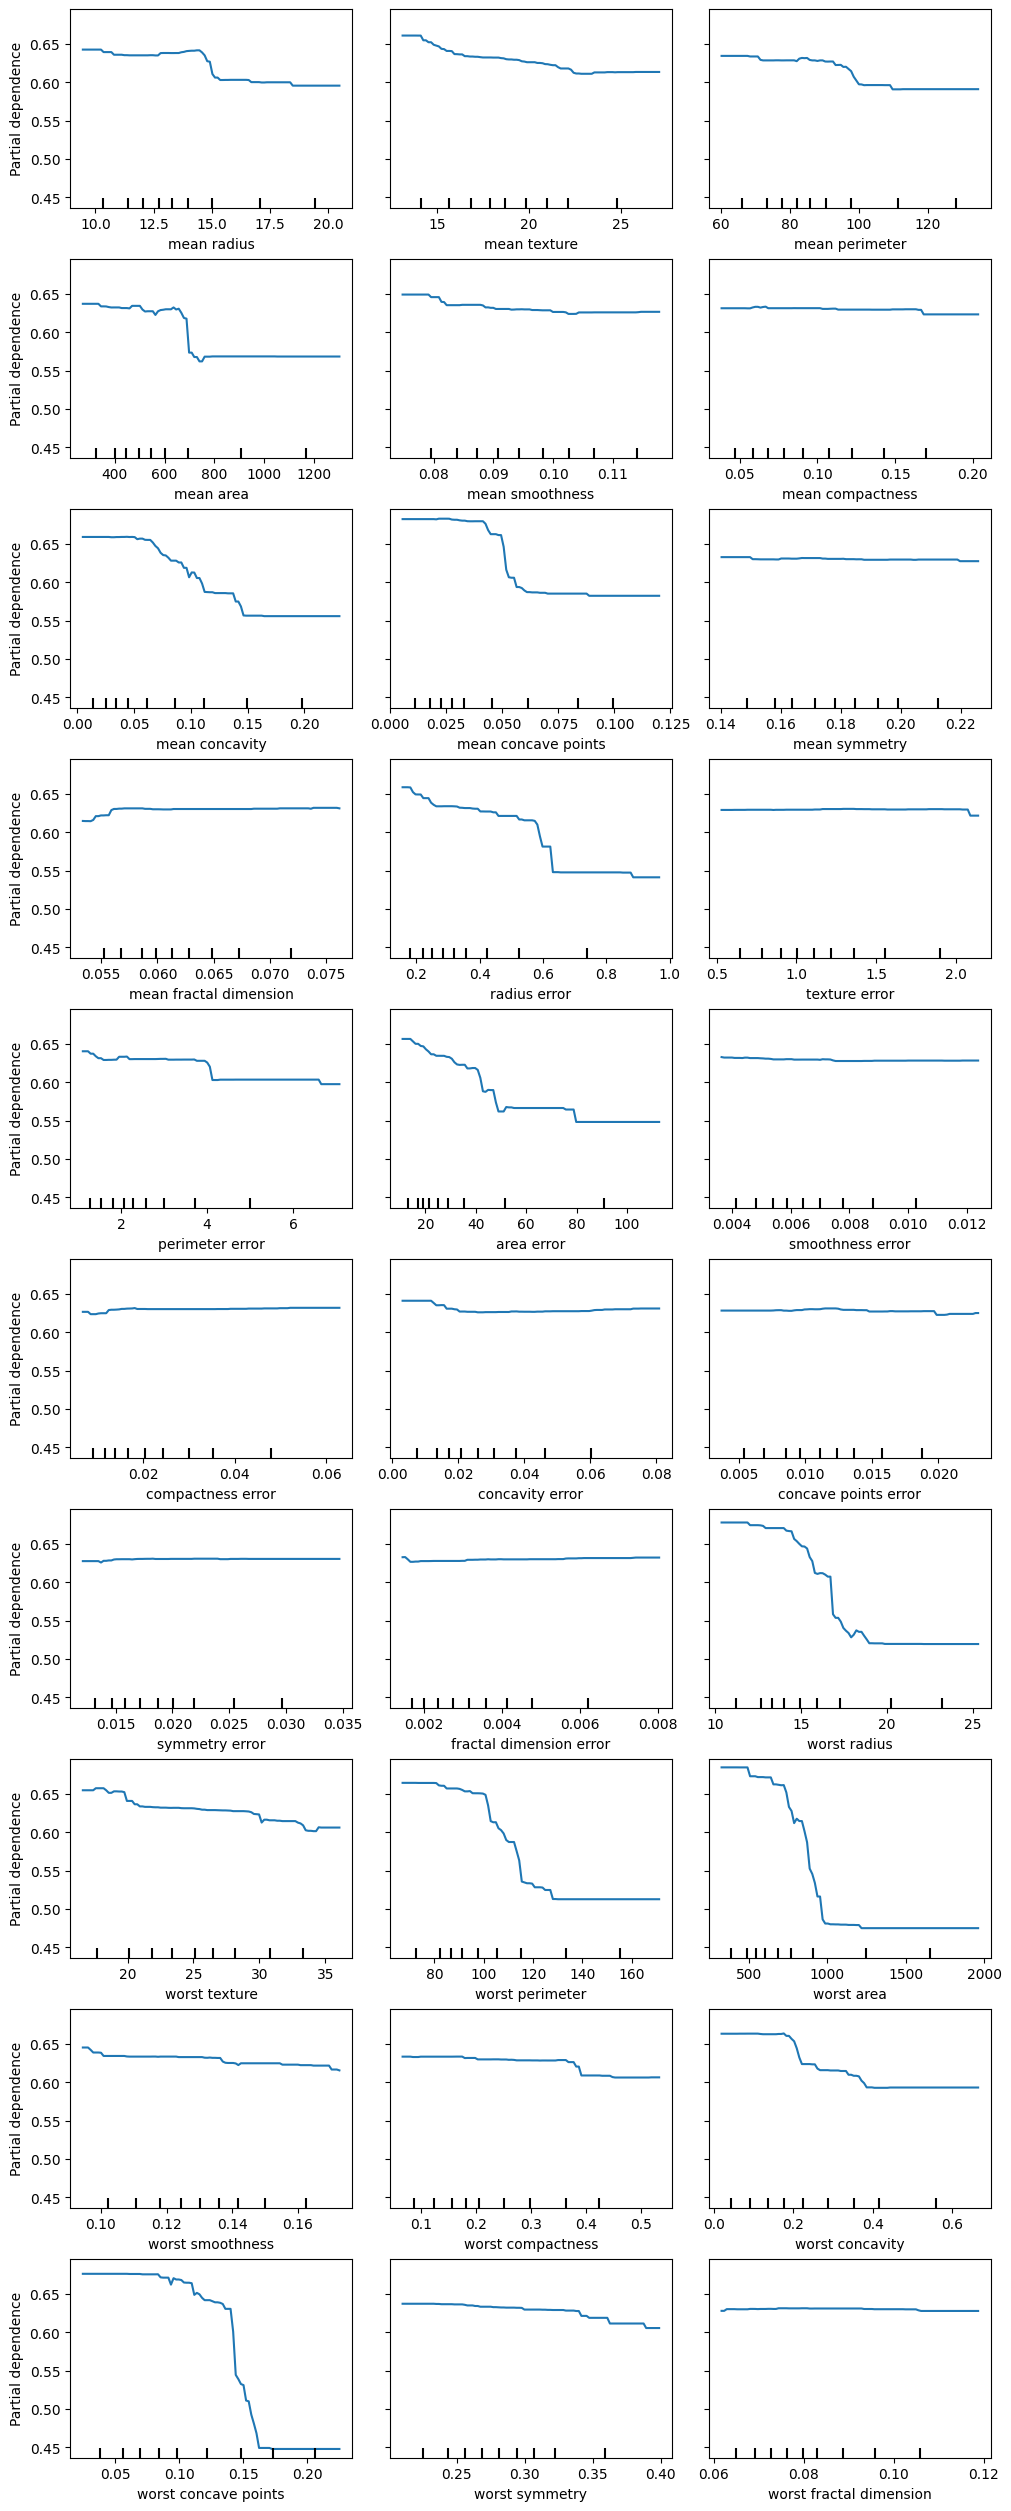

In [ ]:
fig, ax = plt.subplots(ncols=3, nrows=10, figsize=(10, 25), constrained_layout=True)
display = PartialDependenceDisplay.from_estimator(clf, X_train, features=X_train.columns, kind="average", ax=ax)
plt.show()


In [ ]:
X, y = fetch_openml("titanic", version=1, as_frame=True, return_X_y=True, parser="pandas")

categorical_columns = ["pclass", "sex", "embarked"]
numerical_columns = ["age", "sibsp", "parch", "fare"]

X = X[categorical_columns + numerical_columns]
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer


In [ ]:
categorical_encoder = OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1, encoded_missing_value=-1)
numerical_pipe = SimpleImputer(strategy="mean")

preprocessing = ColumnTransformer(
    [
        ("cat", categorical_encoder, categorical_columns),
        ("num", numerical_pipe, numerical_columns),
    ],
    verbose_feature_names_out=False,
)

rf = Pipeline(
    [
        ("preprocess", preprocessing),
        ("classifier", RandomForestClassifier(random_state=42)),
    ]
)
rf.fit(X_train, y_train)

print(f"RF train accuracy: {rf.score(X_train, y_train):.3f}")
print(f"RF test accuracy: {rf.score(X_test, y_test):.3f}")


RF train accuracy: 0.972
RF test accuracy: 0.787


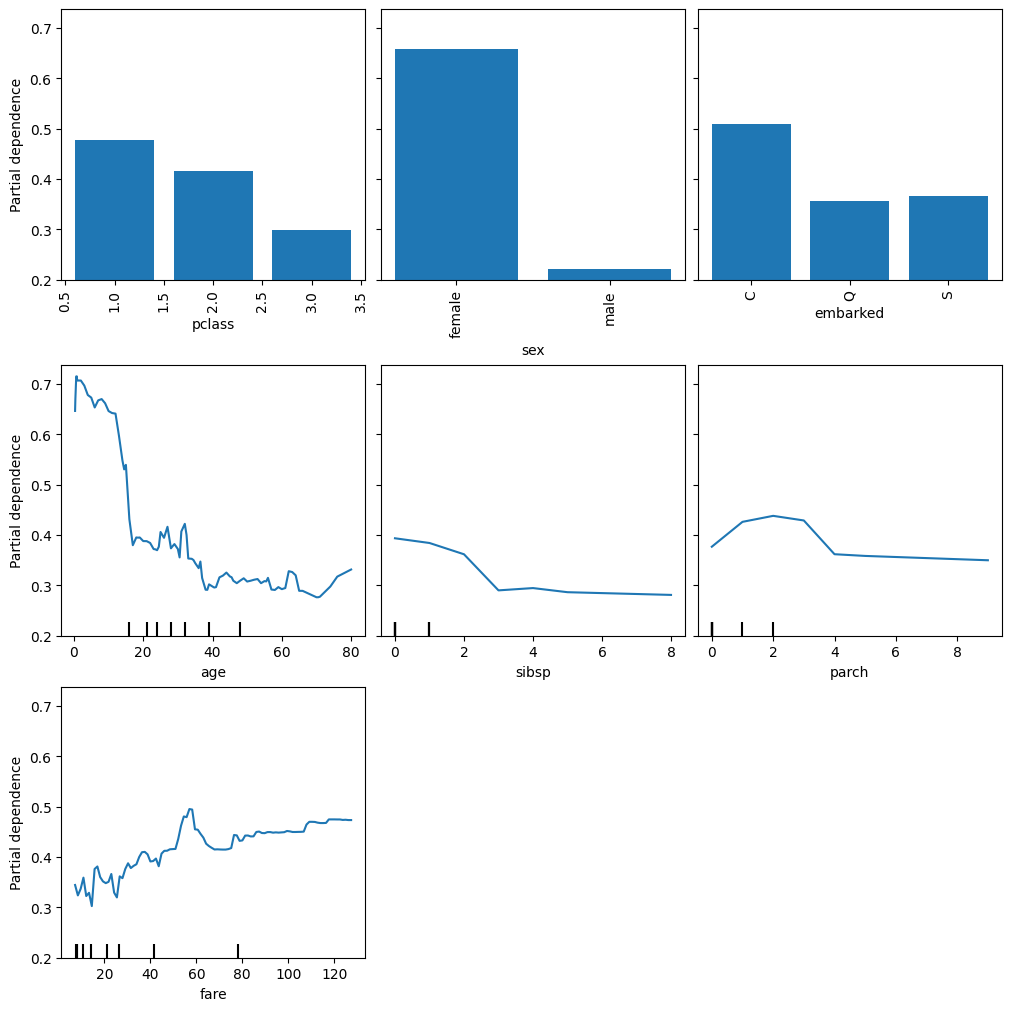

In [ ]:
display = PartialDependenceDisplay.from_estimator(
    rf, X_train, features=X_train.columns, kind="average", categorical_features=categorical_columns
)
display.figure_.set_size_inches(10, 10)
display.figure_.set_constrained_layout(True)
plt.show()
